In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats.mstats import winsorize


import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from statsmodels.tools.eval_measures import mse, rmse

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')



import scipy.stats as stats
from wordcloud import WordCloud

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format


In [2]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead=lead.replace({"Select":np.nan})


In [5]:
#Checking for any duplicates in the data frame
lead.loc[lead.duplicated()]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [6]:
lead.isnull().sum()*100/lead.shape[0]

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

# Data Cleaning

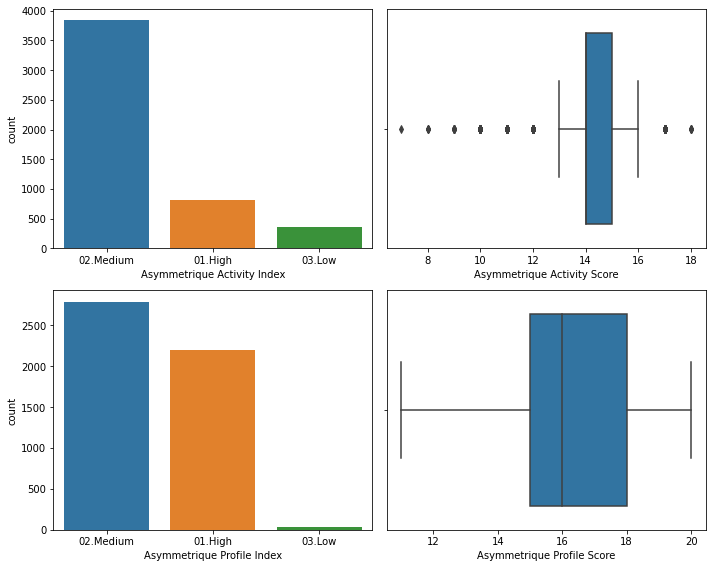

In [7]:
x, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.countplot(lead['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

There is too much variation in thes parameters so its not reliable to impute any value in it. 

45% null values means we need to drop these columns.

In [8]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis =1)

In [9]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.

lead['Lead Quality'] = lead['Lead Quality'].replace({np.nan:'Not Sure'})

In [10]:
lead.City.describe()


count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

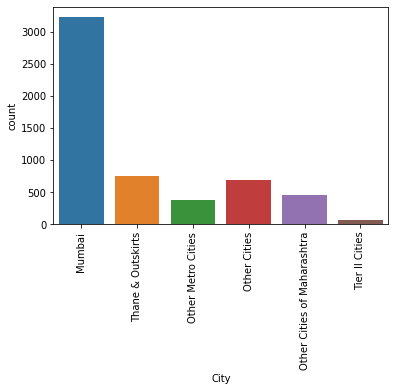

In [11]:
sns.countplot(lead.City)
xticks(rotation = 90)

delete the column - the drawback of this approach is loss of data

impute the column with the mode of the column values - this seems to be relevant for our case

In [12]:
# replacing the missing values with the mode i.e Mumbai

lead['City'] = lead['City'].replace({np.nan:'Mumbai'})



In [13]:
# Specailization

lead.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

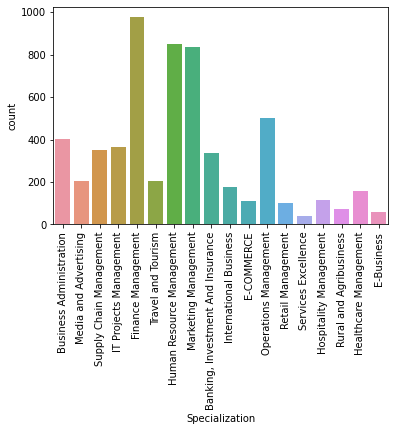

In [14]:
sns.countplot(lead.Specialization)
xticks(rotation = 90)

In [15]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 

In [16]:
lead['Specialization'] = lead['Specialization'].replace({np.nan:'Others'})


In [17]:
# Tags

lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In the Tags column, the value "Will revert after reading the email" has the highest value count and seems to be safe to replace the null value with it since this is not only the mode of the data but also a pretty logical response



In [18]:
lead['Tags'] = lead['Tags'].replace({np.nan:'Will revert after reading the email '})


In [19]:
#checking the frequency of the values
lead['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
lead['What matters most to you in choosing a course'] =lead['What matters most to you in choosing a course'].replace({np.nan:'Better Career Prospects'})


In [21]:
#checking the frequency of the values
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
lead['What is your current occupation'] =lead['What is your current occupation'].replace({np.nan:'Unemployed'})
lead['Country'] =lead['Country'].replace({np.nan:'India'})


In [23]:
# we will drop the columns having more than 70% NA values.
lead = lead.drop(['Lead Profile','How did you hear about X Education'], axis = 1)


In [24]:
lead.isnull().sum()*100/lead.shape[0]

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.39
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

In [25]:
#Dropping the remianing columns which have around 1% of null data, deleting these many records will not impact much.

lead = lead.dropna()

# EDA

In [26]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).


In [27]:
# Finding all the rows where the loan was approved and moving them to a new df
df_convert = lead[lead['Converted'] == 1]
# Finding all the rows where the loan was cancelled and moving them to a new df
df_not_convert = lead[lead['Converted'] == 0]

In [28]:
# Finding the categorical columns and printing the same.

categorical = lead.select_dtypes(exclude=['int64','float64'])
catCols = categorical.columns
catCols =catCols.drop(['Prospect ID','Country'])
catCols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

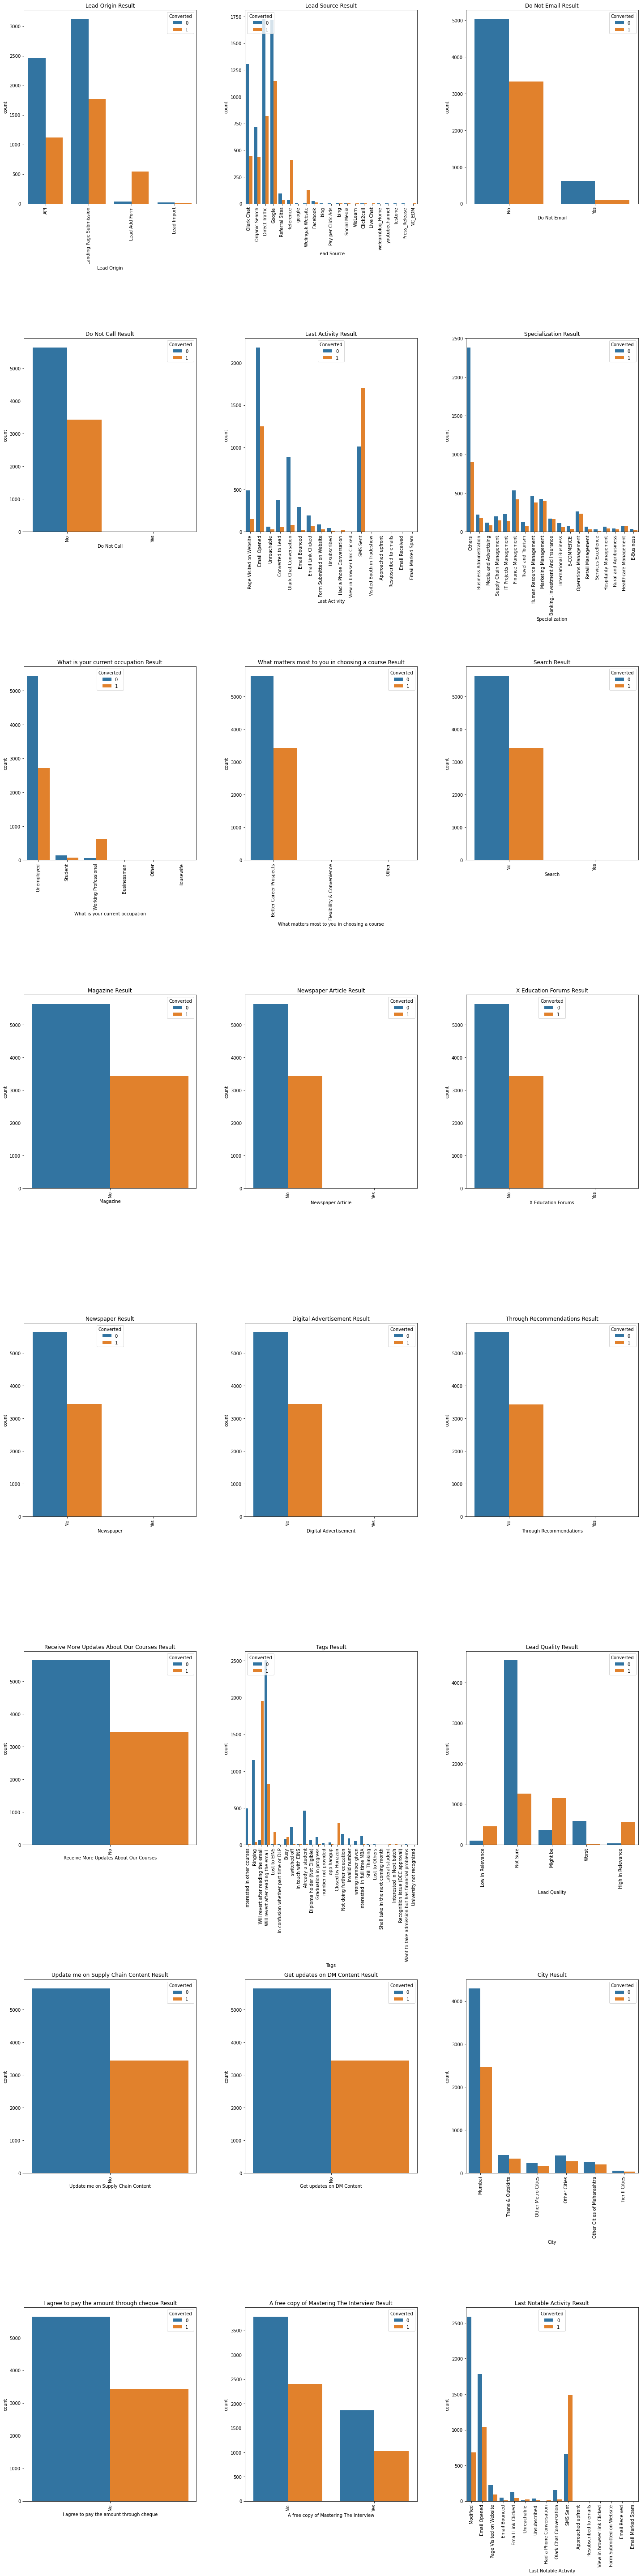

In [29]:
plt.figure(figsize = (20,80))

for i,col in enumerate(catCols):
    plt.subplot(8,3,i+1)
    sns.countplot(x = col,hue = 'Converted', data = lead)
    plt.xticks(rotation=90)      
    plt.title('{} Result'.format(col))
    plt.subplots_adjust(wspace = 1)
    plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [30]:
[lead['Lead Source'].value_counts(normalize=True) <= 0.05]

[Google               False
 Direct Traffic       False
 Olark Chat           False
 Organic Search       False
 Reference             True
 Welingak Website      True
 Referral Sites        True
 Facebook              True
 bing                  True
 google                True
 Click2call            True
 Live Chat             True
 Social Media          True
 Press_Release         True
 Pay per Click Ads     True
 youtubechannel        True
 blog                  True
 WeLearn               True
 NC_EDM                True
 testone               True
 welearnblog_Home      True
 Name: Lead Source, dtype: bool]

In [89]:
combined_col = ['Lead Source','Last Activity','Last Notable Activity','Specialization','Tags']
for col in combined_col:
    counts = lead[col].value_counts(normalize=True)
    lowerlead = counts[counts <= 0.05].index

    lead[col] = lead[col].apply(lambda x:'Other' if x in lowerlead else x)
    


In [91]:
lead[col].value_counts()

Will revert after reading the email     3327
Will revert after reading the email     2016
Other                                   1570
Ringing                                 1187
Interested in other courses              509
Already a student                        465
Name: Tags, dtype: int64

In [93]:
lead[col].str.strip().value_counts()

Will revert after reading the email    5343
Other                                  1570
Ringing                                1187
Interested in other courses             509
Already a student                       465
Name: Tags, dtype: int64

In [86]:
ww = lead['Last Activity'].apply(lambda x:'Other' if x in lowerlead else x)
ww.value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [84]:
lead2 = lead.copy()

In [ ]:
apply(lambda x:'Other' if x in lowerlead else x).value_counts()

In [32]:
lead['Last Activity']

0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                   Unreachable
4             Converted to Lead
                 ...           
9235          Email Marked Spam
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9074, dtype: object

# Checking Outliers

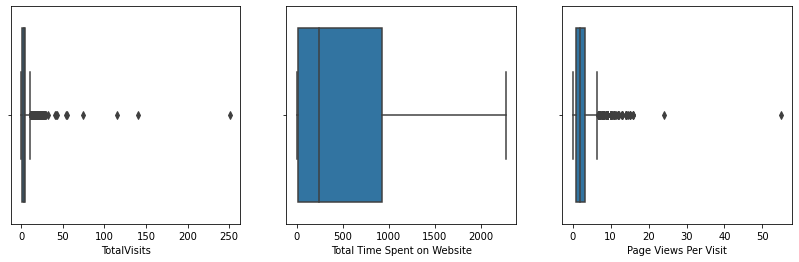

In [33]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(x = 'TotalVisits', data = lead)

plt.subplot(1,3,2)
sns.boxplot(x = 'Total Time Spent on Website',hue = 'Converted', data = lead)

plt.subplot(1,3,3)
sns.boxplot(x = 'Page Views Per Visit',hue = 'Converted', data = lead)

plt.show()

In [34]:
lead.shape

(9074, 31)

In [35]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

lead1 =lead.copy()

lead1['TotalVisits'] = winsorize(lead1['TotalVisits'],(0, 0.05))
lead1['Page Views Per Visit'] = winsorize(lead1['Page Views Per Visit'],(0, 0.05))


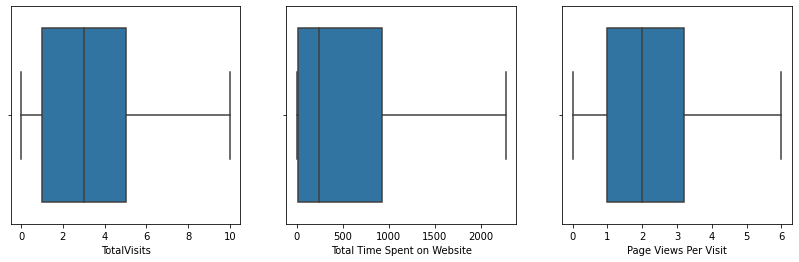

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(x = 'TotalVisits', data = lead1)

plt.subplot(1,3,2)
sns.boxplot(x = 'Total Time Spent on Website',hue = 'Converted', data = lead1)

plt.subplot(1,3,3)
sns.boxplot(x = 'Page Views Per Visit',hue = 'Converted', data = lead1)

plt.show()

## Converting Binary Variables

In [37]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement','Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview','Search']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead1[varlist] = lead1[varlist].apply(binary_map)


In [38]:
leads = pd.get_dummies(lead1,columns=['Lead Origin', 'Lead Source','Country','Specialization', 'What is your current occupation',
            'What matters most to you in choosing a course', 'Magazine', 'Last Activity',
            'Through Recommendations','Tags', 'Lead Quality','City','Last Notable Activity'],drop_first=True)

In [39]:
leads

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.00,0,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.00,674,2.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.00,1532,2.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.00,305,1.00,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.00,1428,1.00,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,0,1,8.00,1845,2.67,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,0,0,0,2.00,238,2.00,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,1,0,0,2.00,199,2.00,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,0,0,1,3.00,499,3.00,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
# The features are assigned to X
X = leads.drop(['Prospect ID','Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00,1532,2.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.00,1428,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# the target is assigned to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cont_var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[cont_var] = scaler.fit_transform(X_train[cont_var])
X_test[cont_var] = scaler.fit_transform(X_test[cont_var])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5885,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8505,0,0,1.36,2.27,0.68,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
894,0,0,1.72,-0.82,-0.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6437,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2988,0,0,1.00,1.37,0.40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
X_train[cont_var].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6805.00,6805.00,6805.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.15,-0.89,-1.27
25%,-0.79,-0.87,-0.71
50%,-0.07,-0.44,-0.15
75%,0.64,0.80,0.59
max,2.44,3.27,2.07


## Model Building

In [45]:
from sklearn.linear_model import TweedieRegressor
log_reg = TweedieRegressor(power=1, alpha=0.5, link='log')
log_reg.fit(X_train,y_train)

train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('One-vs-rest', '-'*20, 
      'Accuracy on the train data set: {:.2f}'.format(train_accuracy),
      'Accuracy on the test data set: {:.2f}'.format(test_accuracy),sep='\n')

One-vs-rest
--------------------
Accuracy on the train data set: 0.24
Accuracy on the test data set: 0.24


In [46]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_train,y_train),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.00,0.83,0.84
1,0.01,0.89,0.89
2,0.10,0.93,0.91
3,1.00,0.94,0.92
4,10.00,0.94,0.92
5,100.00,0.94,0.92
6,1000.00,0.94,0.92


# Model Building

In [47]:
# Logistic regression model with Stat Model

X_train = sm.add_constant(X_train)
results = sm.GLM(y_train, X_train, family = sm.families.Binomial()).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6647
Model Family:                Binomial   Df Model:                          157
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Jul 2020   Deviance:                          nan
Time:                        15:31:31   Pearson chi2:                 2.53e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     6.11e+16   1.09e+08    5.6e+08      0.000    6.11e+16    6.11e+16
Do Not Email                                                            -3.741e+14   4.33e+06  -8.63e+07      0.000   -3.74e+14   -3.74e+14
Do Not Call                                                              2.079e+14   4.78e+07   4.35e+06      0.000    2.08e+14    2.08e+14
TotalVisits                                                              9.814e+13   1.41e+06   6.98e+07      0.000    9.81e+13    9.81e+13
Total Time Spent on Website                                              2.287e+14      1e+06   2.28e+08      0.000    2.29e+14    2.29e+14
Page Views Per Visit                                                    -6.869e+13   1.54e+06  -4.47e+07      0.000   -6.87e+13   -6.87e+13
Search                                                                   3.372e+14   2.39e+07   1.41e+07      0.000    3.37e+14    3.37e+14
Newspaper Article                                                        9.157e+16   6.74e+07   1.36e+09      0.000    9.16e+16    9.16e+16
X Education Forums                                                      -9.554e+16   1.13e+08  -8.46e+08      0.000   -9.55e+16   -9.55e+16
Newspaper                                                               -6.343e+14   6.74e+07  -9.42e+06      0.000   -6.34e+14   -6.34e+14
Digital Advertisement                                                    6.682e+14   4.81e+07   1.39e+07      0.000    6.68e+14    6.68e+14
Receive More Updates About Our Courses                                    -35.4399   7.04e-07  -5.03e+07      0.000     -35.440     -35.440
Update me on Supply Chain Content                                        4915.7636   4.29e-06   1.14e+09      0.000    4915.764    4915.764
Get updates on DM Content                                               -2085.7309   2.09e-06  -9.96e+08      0.000   -2085.731   -2085.731
I agree to pay the amount through cheque                                -1181.6908   1.73e-06  -6.84e+08      0.000   -1181.691   -1181.691
A free copy of Mastering The Interview                                  -4.577e+13   2.64e+06  -1.73e+07      0.000   -4.58e+13   -4.58e+13
Lead Origin_Landing Page Submission                                     -2.452e+14   3.33e+06  -7.37e+07      0.000   -2.45e+14   -2.45e+14
Lead Origin_Lead Add Form                                               -7.574e+14   4.77e+07  -1.59e+07      0.000   -7.57e+14   -7.57e+14
Lead Origin_Lead Import                                                  6.131e+15   7.22e+07    8.5e+07      0.000    6.13e+15    6.13e+15
Lea

As it can be seen there are too many variables to analyse here. So, we will use RFE to select only the important variables which would be used to build our model.

In [48]:
# Logistic regression model

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE


selector =RFE(estimator=LogisticRegression(), n_features_to_select = 15).fit(X_train, y_train)

select =selector.support_
select

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True,

In [49]:
col = X_train.columns[select ==True]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [50]:
X_train2 = sm.add_constant(X_train[col])
results2 = sm.GLM(y_train, X_train2, family = sm.families.Binomial()).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6789
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1488.5
Date:                Tue, 14 Jul 2020   Deviance:                       2977.1
Time:                        15:31:58   Pearson chi2:                 1.26e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4728      0.071    -20.831      0.000      -1.611      -1.334
Lead Source_Welingak Website                      4.5774      0.742      6.172      0.000       3.124       6.031
Last Activity_SMS Sent                            2.2190      0.106     20.977      0.000       2.012       2.426
Tags_Busy                                         0.5669      0.218      2.598      0.009       0.139       0.995
Tags_Closed by Horizzon                           7.5550      0.720     10.498      0.000       6.144       8.966
Tags_Lateral student                             26.3676    1.2e+05      0.000      1.000   -2.35e+05    2.35e+05
Tags_Lost to EINS                                 7.1313      0.693     10.288      0.000       5.773       8.490
Tags_Ringing                                     -3.4256      0.233    -14.679      0.000      -3.883      -2.968
Tags_Will revert after reading the email          5.1146      0.180     28.376      0.000       4.761       5.468
Tags_invalid number                             -24.7699   2.35e+04     -0.001      0.999   -4.61e+04    4.61e+04
Tags_number not provided                        -24.8242   4.19e+04     -0.001      1.000   -8.22e+04    8.21e+04
Tags_switched off                                -3.6509      0.519     -7.034      0.000      -4.668      -2.634
Tags_wrong number given                         -24.7799   3.22e+04     -0.001      0.999   -6.32e+04    6.31e+04
Lead Quality_Worst                               -2.8839      0.548     -5.259      0.000      -3.959      -1.809
Last Notable Activity_Modified                   -1.9619      0.117    -16.740      0.000      -2.192      -1.732
Last Notable Activity_Olark Chat Conversation    -1.2080      0.395     -3.061      0.002      -1.982      -0.435
=================================================================================================================
"""

In [51]:
col2 = col.drop('Tags_Lateral student',1)
col2

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [52]:
X_train3 = sm.add_constant(X_train[col2])
results3 = sm.GLM(y_train, X_train3, family = sm.families.Binomial()).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1491.9
Date:                Tue, 14 Jul 2020   Deviance:                       2983.7
Time:                        15:31:58   Pearson chi2:                 1.26e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4745      0.071    -20.853      0.000      -1.613      -1.336
Lead Source_Welingak Website                      4.5726      0.741      6.167      0.000       3.119       6.026
Last Activity_SMS Sent                            2.2302      0.106     21.106      0.000       2.023       2.437
Tags_Busy                                         0.5590      0.218      2.561      0.010       0.131       0.987
Tags_Closed by Horizzon                           7.5449      0.720     10.485      0.000       6.135       8.955
Tags_Lost to EINS                                 7.1220      0.693     10.274      0.000       5.763       8.481
Tags_Ringing                                     -3.4336      0.233    -14.712      0.000      -3.891      -2.976
Tags_Will revert after reading the email          5.1081      0.180     28.374      0.000       4.755       5.461
Tags_invalid number                             -24.7773   2.35e+04     -0.001      0.999   -4.61e+04    4.61e+04
Tags_number not provided                        -24.8310   4.19e+04     -0.001      1.000   -8.22e+04    8.21e+04
Tags_switched off                                -3.6595      0.519     -7.050      0.000      -4.677      -2.642
Tags_wrong number given                         -24.7883   3.22e+04     -0.001      0.999   -6.31e+04    6.31e+04
Lead Quality_Worst                               -2.8862      0.548     -5.263      0.000      -3.961      -1.811
Last Notable Activity_Modified                   -1.9487      0.117    -16.707      0.000      -2.177      -1.720
Last Notable Activity_Olark Chat Conversation    -1.2057      0.394     -3.057      0.002      -1.979      -0.433
=================================================================================================================
"""

In [53]:
col3 = col2.drop('Tags_number not provided',1)


In [54]:
X_train4 = sm.add_constant(X_train[col3])
results4 = sm.GLM(y_train, X_train4, family = sm.families.Binomial()).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6791
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1499.4
Date:                Tue, 14 Jul 2020   Deviance:                       2998.8
Time:                        15:31:58   Pearson chi2:                 1.24e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4861      0.071    -21.027      0.000      -1.625      -1.348
Lead Source_Welingak Website                      4.5834      0.741      6.186      0.000       3.131       6.035
Last Activity_SMS Sent                            2.2109      0.105     21.049      0.000       2.005       2.417
Tags_Busy                                         0.5808      0.218      2.669      0.008       0.154       1.007
Tags_Closed by Horizzon                           7.5423      0.720     10.482      0.000       6.132       8.953
Tags_Lost to EINS                                 7.1326      0.695     10.264      0.000       5.771       8.495
Tags_Ringing                                     -3.4062      0.233    -14.616      0.000      -3.863      -2.949
Tags_Will revert after reading the email          5.1120      0.180     28.440      0.000       4.760       5.464
Tags_invalid number                             -23.7505   1.43e+04     -0.002      0.999    -2.8e+04     2.8e+04
Tags_switched off                                -3.6309      0.519     -6.997      0.000      -4.648      -2.614
Tags_wrong number given                         -23.7620   1.95e+04     -0.001      0.999   -3.83e+04    3.83e+04
Lead Quality_Worst                               -2.9137      0.547     -5.322      0.000      -3.987      -1.841
Last Notable Activity_Modified                   -1.9316      0.116    -16.597      0.000      -2.160      -1.703
Last Notable Activity_Olark Chat Conversation    -1.1943      0.395     -3.027      0.002      -1.968      -0.421
=================================================================================================================
"""

In [55]:
col4 = col3.drop(['Tags_invalid number','Tags_wrong number given'],1)


In [56]:
X_train5 = sm.add_constant(X_train[col4])
results5 = sm.GLM(y_train, X_train5, family = sm.families.Binomial()).fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6793
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1532.8
Date:                Tue, 14 Jul 2020   Deviance:                       3065.5
Time:                        15:31:59   Pearson chi2:                 1.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5276      0.071    -21.649      0.000      -1.666      -1.389
Lead Source_Welingak Website                      4.6303      0.739      6.268      0.000       3.182       6.078
Last Activity_SMS Sent                            2.1171      0.102     20.680      0.000       1.916       2.318
Tags_Busy                                         0.6770      0.215      3.151      0.002       0.256       1.098
Tags_Closed by Horizzon                           7.5407      0.719     10.483      0.000       6.131       8.951
Tags_Lost to EINS                                 7.2443      0.710     10.198      0.000       5.852       8.637
Tags_Ringing                                     -3.2874      0.232    -14.194      0.000      -3.741      -2.833
Tags_Will revert after reading the email          5.1316      0.179     28.720      0.000       4.781       5.482
Tags_switched off                                -3.5061      0.518     -6.768      0.000      -4.521      -2.491
Lead Quality_Worst                               -3.1407      0.539     -5.826      0.000      -4.197      -2.084
Last Notable Activity_Modified                   -1.8743      0.115    -16.257      0.000      -2.100      -1.648
Last Notable Activity_Olark Chat Conversation    -1.1625      0.395     -2.944      0.003      -1.936      -0.389
=================================================================================================================
"""

## Predicting the target variable for the train dataset



In [57]:
y_train_pred = results5.predict(X_train5)


In [58]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob_model':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index


In [59]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob_model':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob_model,CustID
5885,0,0.03,5885
8505,1,1.00,8505
894,0,0.18,894
6437,0,0.01,6437
2988,1,0.64,2988


In [60]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob_model.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob_model,CustID,Predicted
5885,0,0.03,5885,0
8505,1,1.00,8505,1
894,0,0.18,894,0
6437,0,0.01,6437,0
2988,1,0.64,2988,1


In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Creating the Confusion matrix to calculate the Metrics

confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)


[[4002  196]
 [ 331 2276]]


## Confusion Matrix

In [62]:
# Pulling out all the necessary values from the confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
print("Accuracy score from train set : ",accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


Accuracy score from train set :  0.922556943423953


In [64]:
print("Precision score from train set : ",precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


Precision score from train set :  0.9207119741100324


In [65]:
print ("The Recall Score from train set:",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

The Recall Score from train set: 0.8730341388569237


In [66]:
print("Specificity from train data set: ", TN / float(TN+FP))


Specificity from train data set:  0.9533111005240591


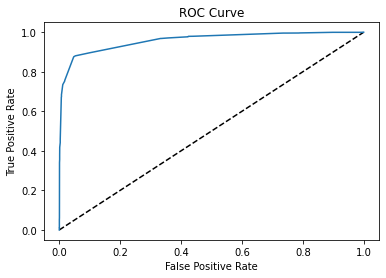

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob_model)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [68]:
print('AUC Score : ', roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob_model))


AUC Score :  0.9593452176342764


## Finding Optimal Cutoff Point


In [69]:
y_train_pred_final

,Converted,Converted_prob_model,CustID,Predicted
5885,0,0.03,5885,0
8505,1,1.00,8505,1
894,0,0.18,894,0
6437,0,0.01,6437,0
2988,1,0.64,2988,1
...,...,...,...,...
367,0,0.03,367,0
82,1,0.97,82,1
8199,0,0.06,8199,0
7077,0,0.18,7077,0


In [70]:
# Let's create columns with different probability cutoffs 

cutoffs = [(x)/10 for x in range(10)]
for i in cutoffs:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob_model.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()


,Converted,Converted_prob_model,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5885,0,0.03,5885,0,1,0,0,0,0,0,0,0,0,0
8505,1,1.00,8505,1,1,1,1,1,1,1,1,1,1,1
894,0,0.18,894,0,1,1,0,0,0,0,0,0,0,0
6437,0,0.01,6437,0,1,0,0,0,0,0,0,0,0,0
2988,1,0.64,2988,1,1,1,1,1,1,1,1,0,0,0


In [71]:
#Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','precision'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    conf1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final[i])
    recall = recall_score(y_train_pred_final.Converted, y_train_pred_final[i])
    precision= precision_score(y_train_pred_final.Converted, y_train_pred_final[i])
    cutoff_df.loc[i] =[i,accuracy,recall,precision]
print(cutoff_df)

      prob  accuracy  recall  precision
0.00  0.00      0.38    1.00       0.38
0.10  0.10      0.78    0.97       0.64
0.20  0.20      0.90    0.90       0.85
0.30  0.30      0.92    0.88       0.92
0.40  0.40      0.92    0.87       0.92
0.50  0.50      0.92    0.87       0.92
0.60  0.60      0.92    0.87       0.92
0.70  0.70      0.89    0.75       0.96
0.80  0.80      0.89    0.73       0.98
0.90  0.90      0.88    0.69       0.98


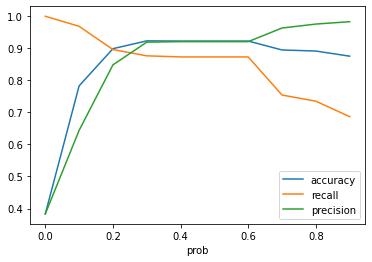

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','recall','precision'])

## Predicting and evaluating the model on test data


In [73]:
X_test[cont_var] = scaler.fit_transform(X_test[cont_var])


In [74]:
X_test = X_test[col4]
X_test1 = sm.add_constant(X_test)

In [75]:
y_test_pred = results5.predict(X_test1)

In [76]:
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [77]:
y_test_df['CustID'] = y_test_df.index

In [78]:
y_test_pred_1.reset_index()
y_test_df.reset_index()

,index,Converted,CustID
0,3271,0,3271
1,1490,1,1490
2,7936,0,7936
3,4216,1,4216
4,3830,0,3830
...,...,...,...
2264,7748,0,7748
2265,5538,0,5538
2266,1232,0,1232
2267,1457,0,1457


In [79]:
y_test_df

,Converted,CustID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830
...,...,...
7748,0,7748
5538,0,5538
1232,0,1232
1457,0,1457


In [80]:
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)
y_test_pred_final.head()

,Converted,CustID,0
3271,0,3271,0.18
1490,1,1490,0.97
7936,0,7936,0.18
4216,1,4216,0.98
3830,0,3830,0.18


In [81]:
y_test_pred_final = y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})
